In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random

random.seed(25)
np.random.seed(25)
tf.random.set_seed(25)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/mnist dataset/train.csv')
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:

test_df = pd.read_csv('/content/drive/MyDrive/mnist dataset/test.csv')
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print("Shape of X_train:", train_df.shape)
print("Shape of Y_train:", test_df.shape)

Shape of X_train: (42000, 785)
Shape of Y_train: (28000, 784)


In [6]:
X_train = train_df.drop(labels = ['label'], axis = 1)
y_train = train_df['label']

In [7]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [9]:
X_train = X_train / 255.0
X_test  = test_df / 255.0

In [10]:
X_train = X_train.values.reshape(-1,28,28,1).astype('float32')
X_test  = X_test.values.reshape(-1,28,28,1).astype('float32')

In [11]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", X_test.shape)

Shape of X_train: (42000, 28, 28, 1)
Shape of Y_train: (28000, 28, 28, 1)


In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)

In [13]:
from sklearn.model_selection import train_test_split
X_trains, X_val, y_trains, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [14]:
print("X_train shape:", X_trains.shape)
print("y_train shape:", y_trains.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (33600, 28, 28, 1)
y_train shape: (33600, 10)
X_val shape: (8400, 28, 28, 1)
y_val shape: (8400, 10)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
history = model.fit(X_trains, y_trains,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=128,
                    verbose=1,callbacks=callback)

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 34s 120ms/step - accuracy: 0.7420 - loss: 0.8161 - val_accuracy: 0.9686 - val_loss: 0.0987
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 117ms/step - accuracy: 0.9604 - loss: 0.1301 - val_accuracy: 0.9782 - val_loss: 0.0662
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - accuracy: 0.9715 - loss: 0.0945 - val_accuracy: 0.9837 - val_loss: 0.0517
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 35s 134ms/step - accuracy: 0.9785 - loss: 0.0696 - val_accuracy: 0.9857 - val_loss: 0.0448
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 30s 115ms/step - accuracy: 0.9812 - loss: 0.0599 - val_accuracy: 0.9868 - val_loss: 0.0443
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.9827 - loss: 0.0546 - val_accuracy: 0.9877 - val_loss: 0.0415
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 31s 119ms/step - accuracy: 0.9846 - loss: 0.0491 - val_accuracy: 0.9883 - val_loss: 0.0380
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - accuracy: 0.9876 -

In [21]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=1)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9929 - loss: 0.0444
Test Loss: 0.0398489348590374
Test Accuracy: 0.9927380681037903


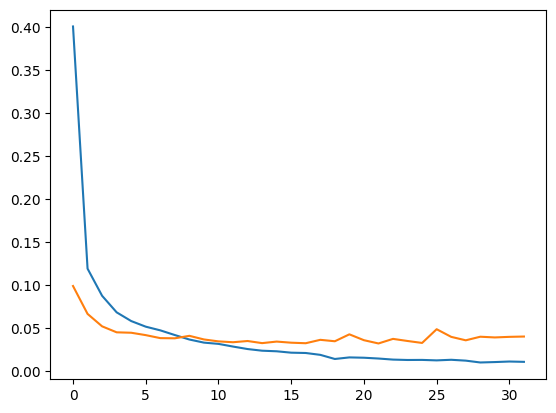

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

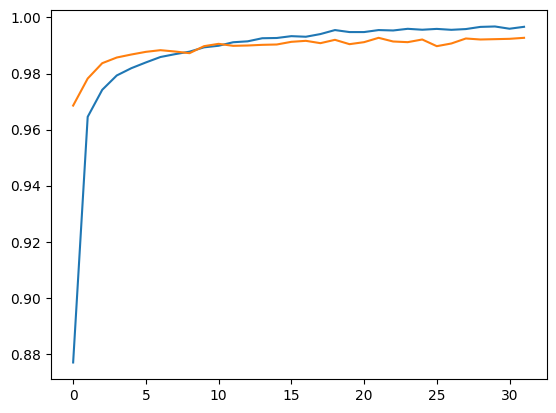

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [31]:

y_probs = model.predict(X_val)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [32]:

pred_labels = y_probs.argmax(axis=1)
pred_labels


array([8, 1, 9, ..., 3, 0, 9])

In [33]:
# Predicting results and selecting the highest probability index
results = model.predict(X_test).argmax(axis=1)

# Creating the submission DataFrame
submission = pd.DataFrame({
    "ImageId": range(1, len(results) + 1),
    "Label": results
})

# Save to a CSV file for submission
submission.to_csv('submission.csv', index=False)

print(submission)



875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]
